In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
%matplotlib notebook

In [3]:
df = pd.read_csv('data.csv') #reading file 

In [4]:
df = df.drop(['id','Unnamed: 32'],axis=1) #dropping id and empty column at the end.

In [5]:
labelencoder_Y = LabelEncoder()
df.iloc[:,0] = labelencoder_Y.fit_transform(df.iloc[:,0].values) #Change 'M' and 'B' into 1 and 0 respectively.

In [8]:
X = df.iloc[:,1:].values #training on all attributes
sc = StandardScaler()
X = sc.fit_transform(X) #Scaling data to follow a Gaussian distribution

Y = df.iloc[:,0].values #training on diagnosis

#Initial train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
#Final split resulting in a 60/20/20 split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2)

In [12]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the second hidden layer
classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
# Adding dropout to prevent overfitting
classifier.add(Dropout(rate=0.1))

# Adding the output layer
classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling the ANN
classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Fitting the ANN
classifier.fit(X_train, Y_train, batch_size=100, validation_data=(X_val,Y_val), epochs=150, verbose=0)

# Predictions from our model
prediction = classifier.predict(X_test)
prediction = prediction > 0.5

#Printing accuracy
cm = confusion_matrix(Y_test, prediction)
accuracy = (np.trace(cm)/Y_test.size) * 100
print(f'Accuracy = {accuracy}%')

Accuracy = 98.24561403508771%


In [13]:
kfold = KFold(n_splits=10) #10-fold cross-validation data split

In [14]:
acc_per_fold = [] #store the accuracy of every fold
overall_cm = np.zeros((2,2)) #Holds the overall confusion matrix

fold_no = 0 #keep track which fold the loop is in 

for train, test in kfold.split(X, Y):
    
    classifier = Sequential()

    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
    # Adding dropout to prevent overfitting
    classifier.add(Dropout(rate=0.1))

    # Adding the second hidden layer
    classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
    # Adding dropout to prevent overfitting
    classifier.add(Dropout(rate=0.1))

    # Adding the output layer
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

    # Compiling the ANN
    classifier.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

    # Fitting the ANN
    classifier.fit(X[train], Y[train], batch_size=100, epochs=150, verbose=0)

    # Predictions from our model
    prediction = classifier.predict(X[test])
    prediction = prediction > 0.5
    
    #Measuring accuracy
    cm = confusion_matrix(Y[test], prediction)
    overall_cm += cm
    accuracy = (np.trace(cm)/Y[test].size) * 100
    acc_per_fold.append(accuracy)
    print(f'Accuracy for fold {fold_no} is {accuracy}%')
    
    fold_no += 1

print(f'Average accuracy for {kfold.get_n_splits()} folds is {np.mean(acc_per_fold)}%')

Accuracy for fold 0 is 96.49122807017544%
Accuracy for fold 1 is 98.24561403508771%
Accuracy for fold 2 is 94.73684210526315%
Accuracy for fold 3 is 96.49122807017544%
Accuracy for fold 4 is 98.24561403508771%
Accuracy for fold 5 is 98.24561403508771%
Accuracy for fold 6 is 98.24561403508771%
Accuracy for fold 7 is 100.0%
Accuracy for fold 8 is 100.0%
Accuracy for fold 9 is 96.42857142857143%
Average accuracy for 10 folds is 97.71303258145363%


<IPython.core.display.Javascript object>


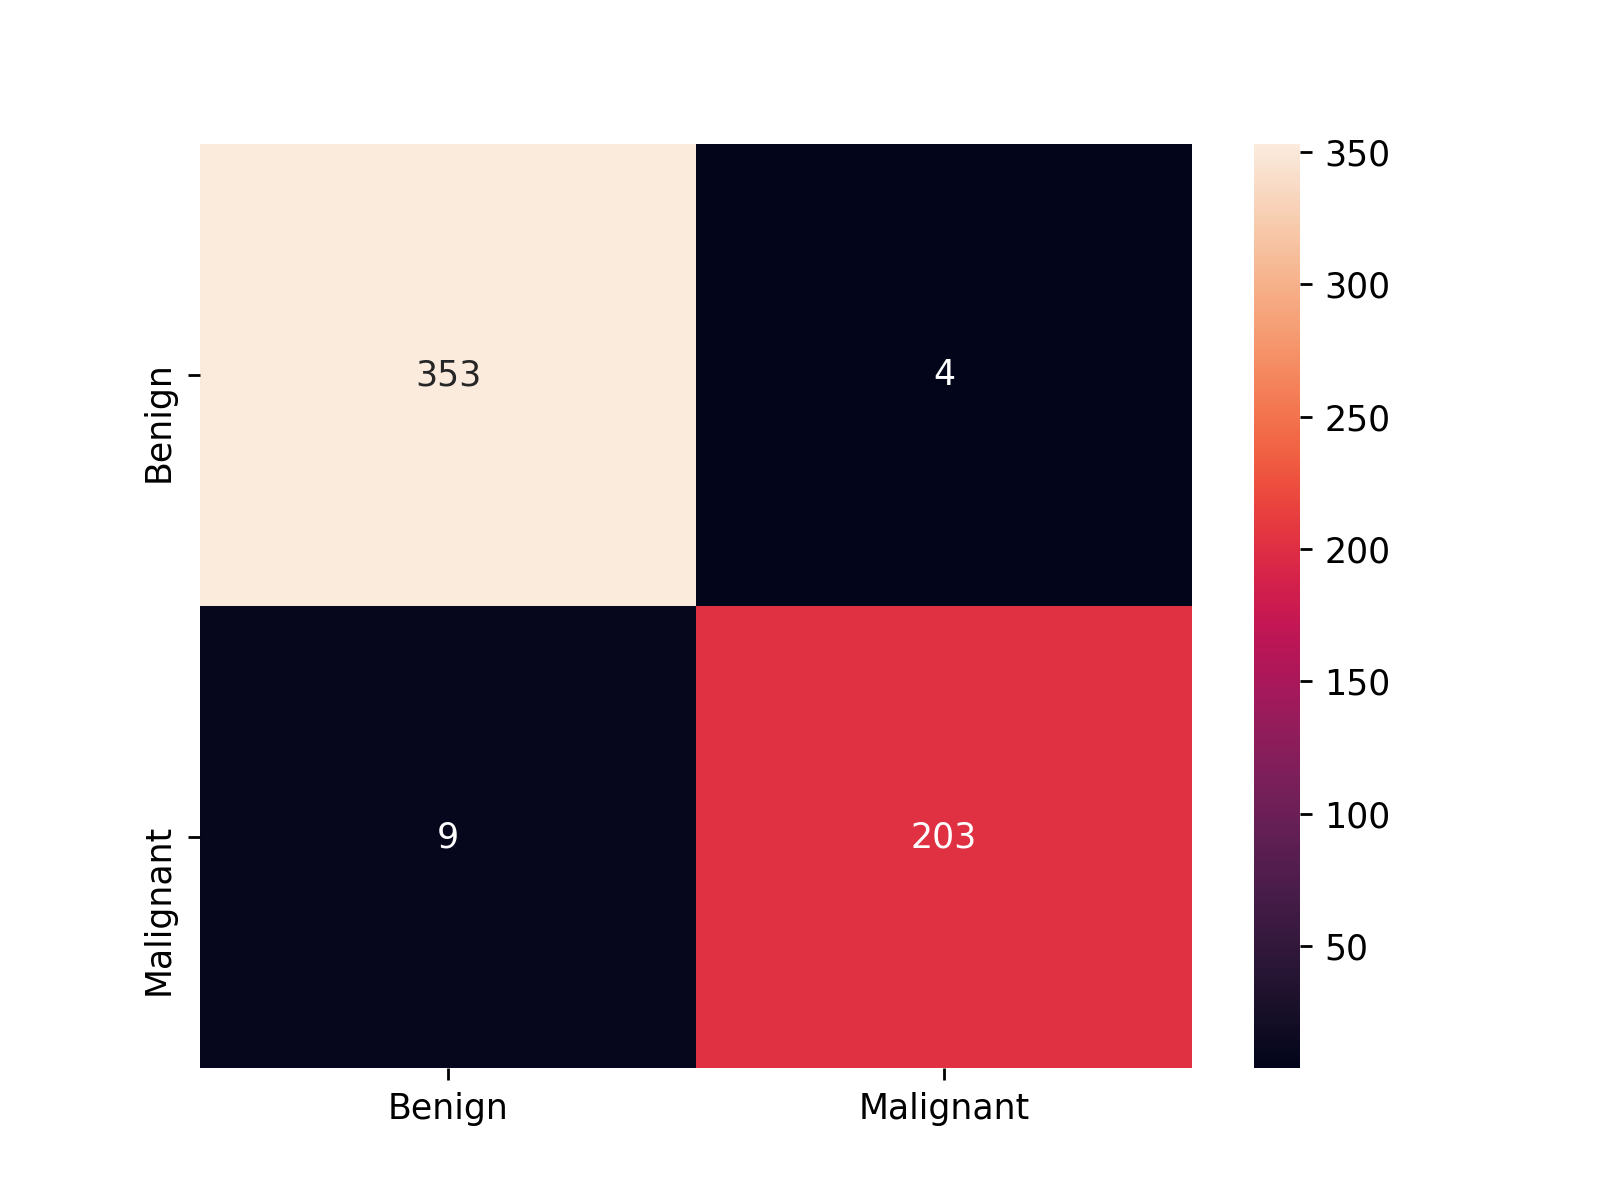

<AxesSubplot:>

In [15]:
sns.heatmap(overall_cm, annot=True, fmt='.0f', xticklabels=['Benign','Malignant'], yticklabels=['Benign','Malignant'])